In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
#read data
df = pd.read_csv('diamonds.csv')

In [127]:
'''
EDA (investigation & check null values and duplicates)
Encode the categorical data
 Scale numeric data (appropriate scaling according to distribution: standard scaler, robust scaler, log or power transformation)
SEARCH ON WHY WE SCALE THE DATA
'''


'\nEDA (investigation & check null values and duplicates)\nEncode the categorical data\n Scale numeric data (appropriate scaling according to distribution: standard scaler, robust scaler, log or power transformation)\nSEARCH ON WHY WE SCALE THE DATA\n'

In [128]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53939 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53939 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [130]:
#drop unneeded column
df=df.drop(columns=['Unnamed: 0']) 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
#check nulls
df.isnull().sum()

carat      0
cut        0
color      0
clarity    1
depth      0
table      0
price      0
x          1
y          0
z          0
dtype: int64

In [132]:
#drop nulls
df=df.dropna()
df.isnull().sum().sum()

np.int64(0)

In [133]:
#summary statistics
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53938.000000,53938,53938,53938,53938.000000,53938.000000,53938.000000,53938.000000,53938.000000,53938.000000
unique,NaN,7,8,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21550,11291,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797941,NaN,NaN,NaN,61.749405,57.457127,3932.842486,5.731153,5.734519,3.538731
std,0.474020,NaN,NaN,NaN,1.432645,2.234512,3989.507519,1.121781,1.142155,0.705712
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.750000,6.540000,6.540000,4.040000


In [134]:
#check duplicates
df.duplicated().sum()

np.int64(146)

In [135]:
#remove duplicates
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# EDA:

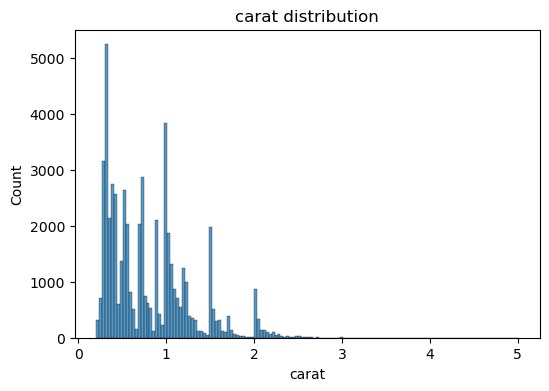

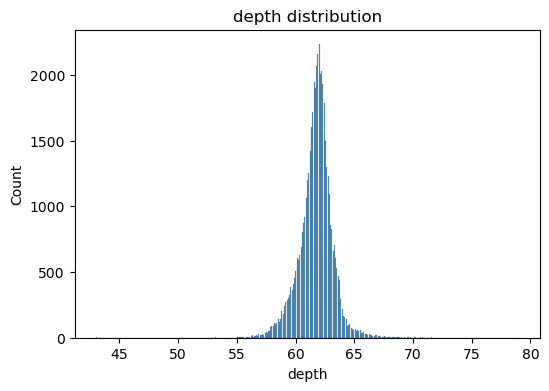

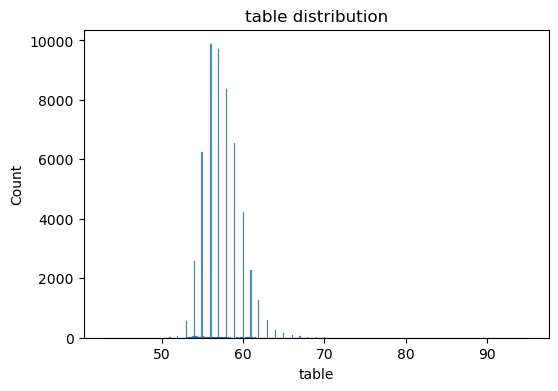

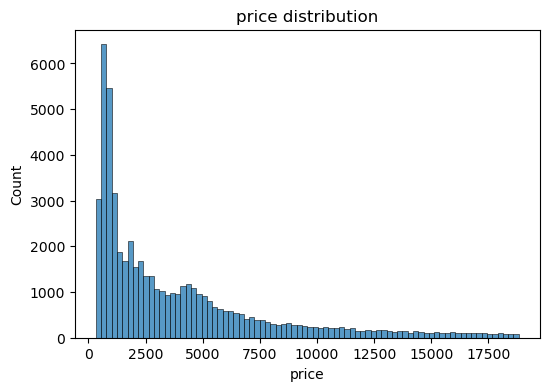

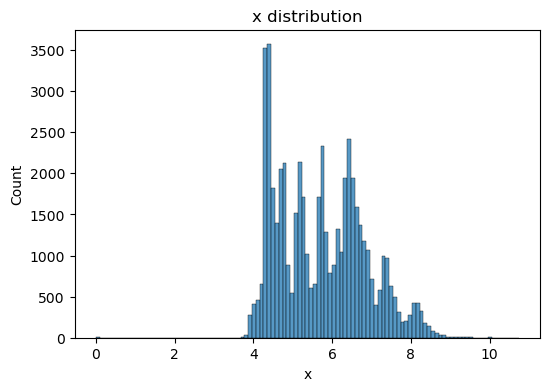

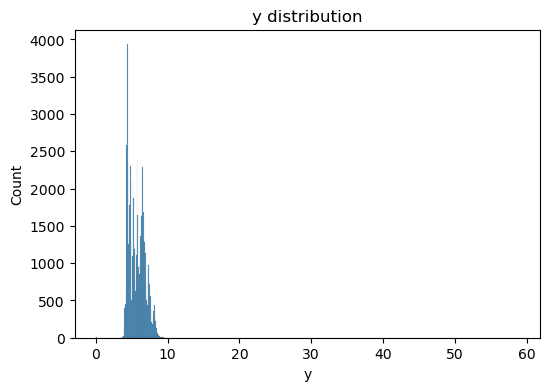

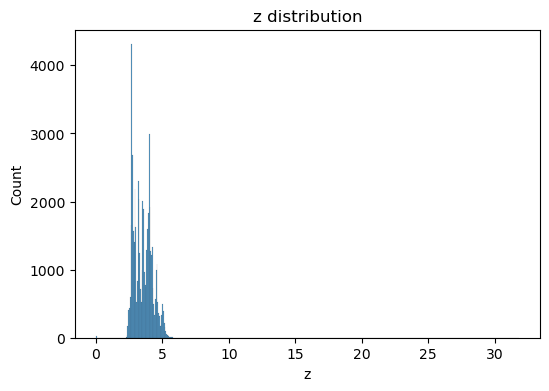

In [136]:
numerical_cols = df.select_dtypes(include=['float64','int64'])
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df[col])
    plt.title(f'{col} distribution')

- the distribution will help me select suitable feature scaling technique

- depthlooks normally distributed

- carat & price show strong skeweness

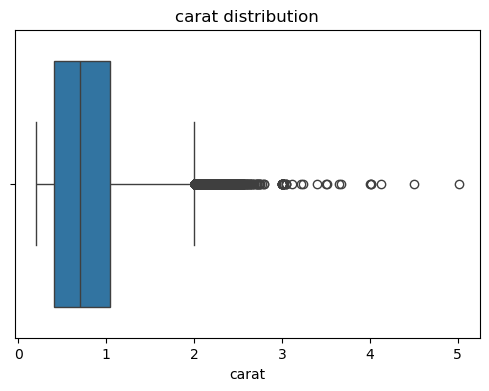

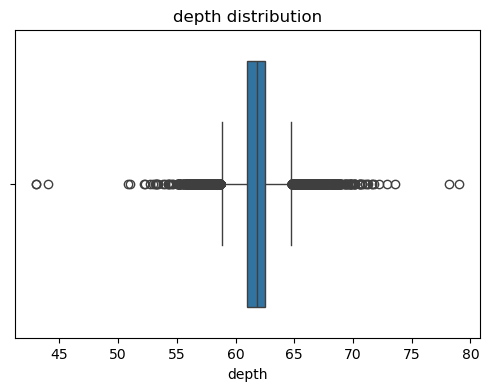

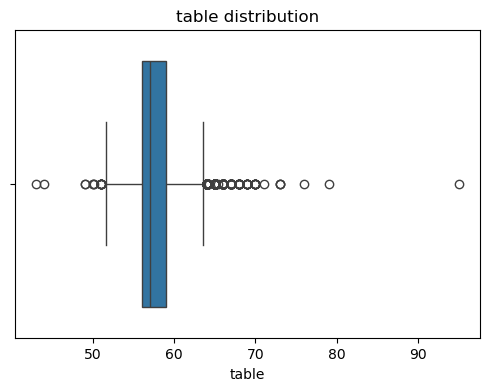

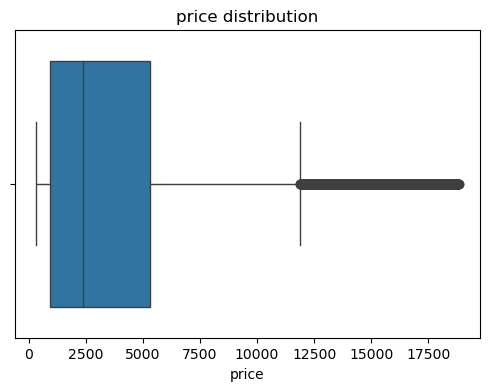

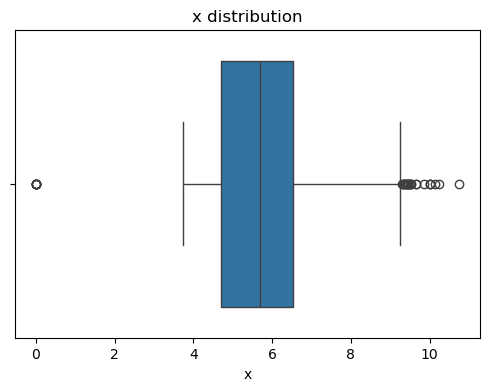

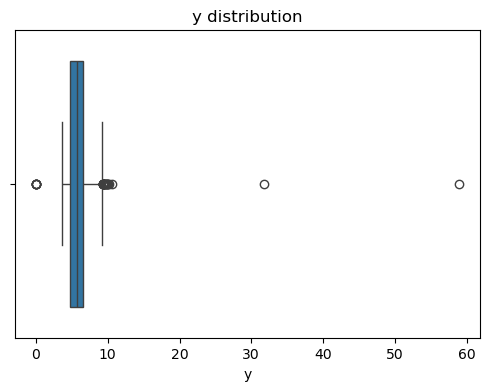

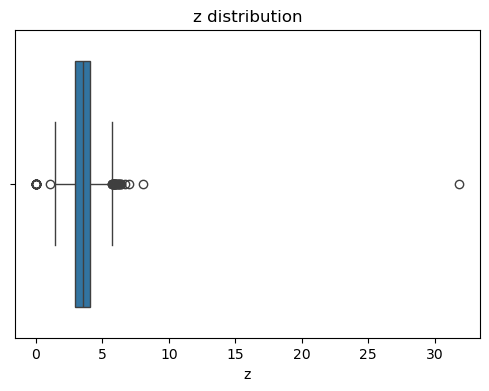

In [137]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} distribution')

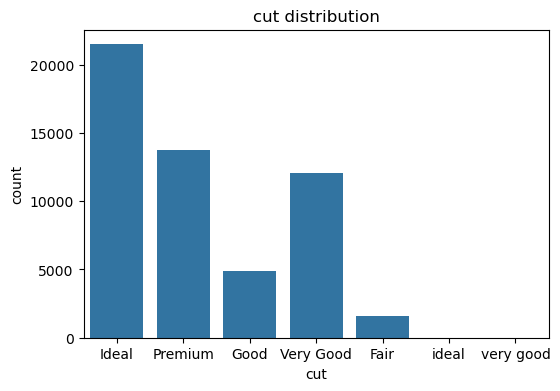

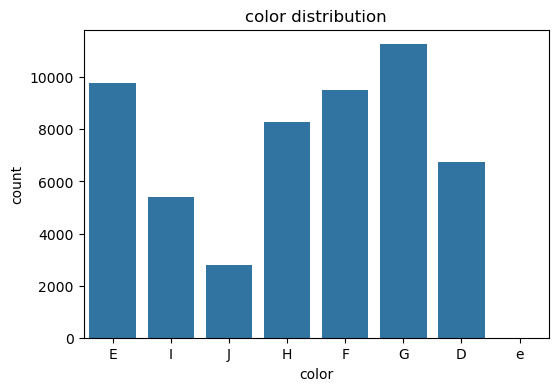

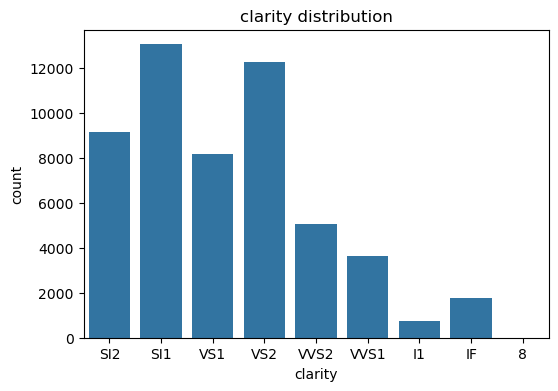

In [138]:
categorical_cols=df.select_dtypes(include='object')
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} distribution')

- The most common diamond cut is **Ideal** suggesting it is the most preferred. The **Fair** cut is the least common

- Diamonds with **G** color are the most frequent. The **J** color is the least common possibly due to being the lowest quality (according to the dataset documentation)

- The majority of diamonds in the dataset have **SI1** clarity indicating it is a popular balance between quality and price

In [139]:
#prepare correlation matrix for the heatmap
corr=numerical_cols.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027862,0.181094,0.921549,0.975380,0.951909,0.953543
depth,0.027862,1.000000,-0.297672,-0.011047,-0.025347,-0.029388,0.094758
table,0.181094,-0.297672,1.000000,0.126575,0.194854,0.183229,0.150269
price,0.921549,-0.011047,0.126575,1.000000,0.884507,0.865399,0.861211
x,0.975380,-0.025347,0.194854,0.884507,1.000000,0.974592,0.970686
y,0.951909,-0.029388,0.183229,0.865399,0.974592,1.000000,0.951844
z,0.953543,0.094758,0.150269,0.861211,0.970686,0.951844,1.000000


<Axes: >

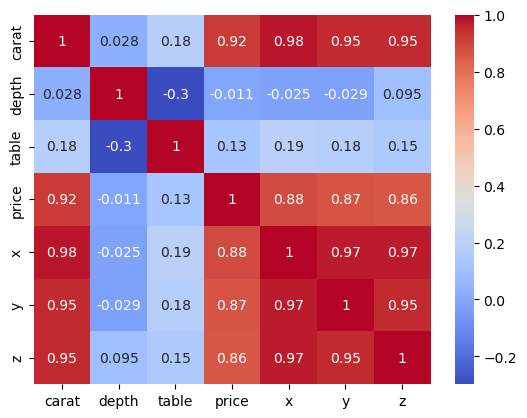

In [140]:
#heatmap
sns.heatmap(corr,annot=True,cmap='coolwarm')

- carat is highly correlated with x(length), y(width), and z (depth): length, width, and depth affect the carat positively (+ve correlation)
- Carat affects price: as carat increases, price also increases

Text(0.5, 1.0, 'Relationship Between Carat and Depth by Price')

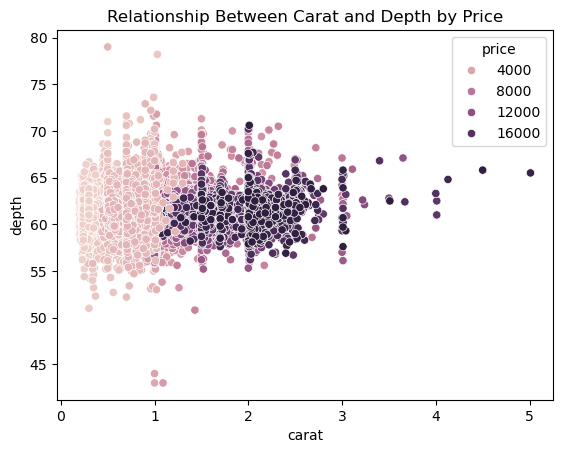

In [141]:
#relationship Between Carat and Depth by Price
sns.scatterplot(data=df,x='carat',y='depth',hue='price')
plt.title('Relationship Between Carat and Depth by Price')

- depth is not really related

# Feature Scaling:
**we scale data to:** 

     - Improve algorithm performance
     
     - Normalize Feature Ranges
     
     - Avoid Bias

     
**Feature scaling techniques:**

- RobustScaler less sensitive to outliers
- Standardization (Z-score Normalization): for normally distributed data
- power transformation: when Addressing skewness and non-normality

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['depth'] = scaler.fit_transform(df[['depth']])

In [143]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[['carat', 'price']] = pt.fit_transform(df[['carat', 'price']])

In [144]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df[['x', 'y', 'z', 'table']]= robust.fit_transform(df[['x', 'y', 'z', 'table']])

# Encoding:

In [145]:
'''
cut       category
color     category
clarity   category
'''

'\ncut       category\ncolor     category\nclarity   category\n'

In [146]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'ideal',
       'very good'], dtype=object)

In [147]:
df['cut']=df['cut'].str.lower()
df['cut'].unique()

array(['ideal', 'premium', 'good', 'very good', 'fair'], dtype=object)

In [148]:
df['cut']=df['cut'].map({'ideal':1, 'fair':2 ,'good':3 ,'very good':4 ,'premium':5})

In [149]:
df['cut'].unique()

array([1, 5, 3, 4, 2])

In [150]:
df['color'].unique()#ordinal:J (worst) to D (best)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', 'e'], dtype=object)

In [151]:
df['color'] = df['color'].str.upper()
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [152]:
df['color']=df['color'].map( {'J': 1,'I': 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 8})
df['color']

0        6
1        6
2        6
3        2
4        1
        ..
53935    8
53936    8
53937    8
53938    3
53939    8
Name: color, Length: 53792, dtype: int64

In [153]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', '8'],
      dtype=object)

- The '8' in the clarity column appears to be incorrect

In [154]:
#investigate 8 in clarity column
df[df['clarity'] == '8']

,carat,cut,color,clarity,depth,table,price,x,y,z
394,-1.262224,4,2,8,0.945452,-0.333333,-1.491222,-0.715847,-0.741758,-0.6875


- since it's one row: drop it

In [155]:
df = df[df['clarity'] != '8']
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

- I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [156]:
df['clarity']=df['clarity'].map({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6, 'VVS1':7,'IF':8})
df['clarity'].unique()

array([2, 3, 5, 4, 6, 7, 1, 8])